<a href="https://colab.research.google.com/github/vinayjoshva/Colab-PyTorch-NeuralNetwork/blob/main/Practical_1_(16352584).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import Libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [2]:
# Step 2: Load and Prepare the Iris Dataset
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=columns)
# Map target classes to numerical values
df['target'] = df['target'].astype('category').cat.codes
# Split data into features and labels
X = df.iloc[:, :-1].values
y = df['target'].values
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)
# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


In [3]:
# Step 3: Define the Neural Network
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.model = nn.Sequential(
    nn.Linear(X_train.shape[1], 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 8),
    nn.ReLU(),
    nn.Linear(8, 3) # Output layer for 3 classes
  )
  def forward(self, x):
    return self.model(x)
# Initialize the model, loss function, and optimizer
model = NeuralNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [18]:
# List to store loss values for each epoch
losses = []

# Training the model
epochs = 20
for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Calculate average loss for the epoch
    avg_loss = running_loss / len(train_loader)
    losses.append(avg_loss)  # Append to the losses list
    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")


Epoch 1/20, Loss: 0.0061
Epoch 2/20, Loss: 0.0081
Epoch 3/20, Loss: 0.0042
Epoch 4/20, Loss: 0.0030
Epoch 5/20, Loss: 0.0016
Epoch 6/20, Loss: 0.0013
Epoch 7/20, Loss: 0.0010
Epoch 8/20, Loss: 0.0010
Epoch 9/20, Loss: 0.0008
Epoch 10/20, Loss: 0.0007
Epoch 11/20, Loss: 0.0005
Epoch 12/20, Loss: 0.0005
Epoch 13/20, Loss: 0.0004
Epoch 14/20, Loss: 0.0004
Epoch 15/20, Loss: 0.0004
Epoch 16/20, Loss: 0.0003
Epoch 17/20, Loss: 0.0003
Epoch 18/20, Loss: 0.0003
Epoch 19/20, Loss: 0.0002
Epoch 20/20, Loss: 0.0002


In [7]:
# Step 5: Validate the Model
model.eval()
correct = 0
total = 0
with torch.no_grad():
  for X_batch, y_batch in test_loader:
    outputs = model(X_batch)
    _, predicted = torch.max(outputs, 1)
    total += y_batch.size(0)
    correct += (predicted == y_batch).sum().item()
accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.9000


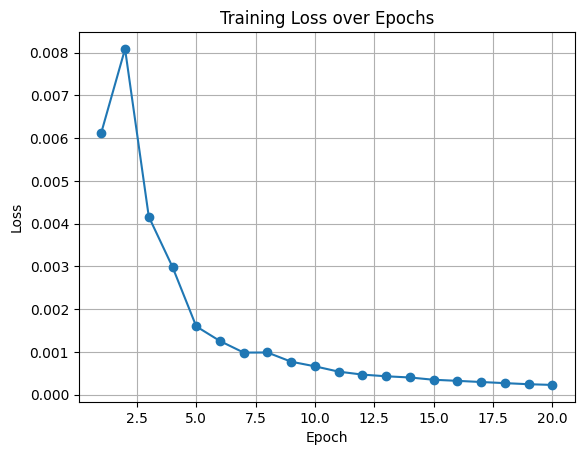

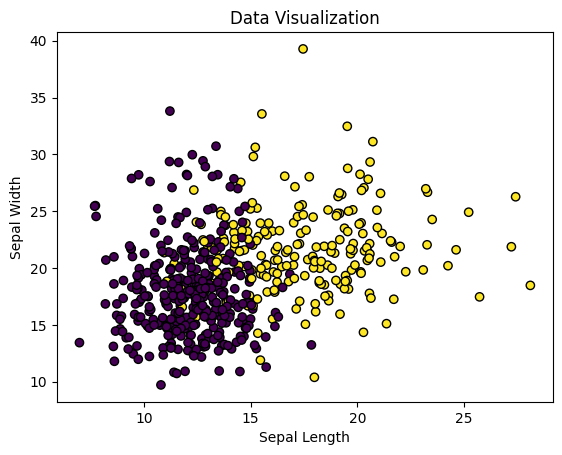

In [19]:
# Step 6: Visualize Training Loss and Data Distribution
import matplotlib.pyplot as plt

# Plot the training loss
plt.plot(range(1, len(losses) + 1), losses, marker='o')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

# Visualize data distribution
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Data Visualization')
plt.show()

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import TensorDataset, DataLoader

# Define column names for the Breast Cancer dataset
columns = ['id', 'diagnosis'] + [f'feature_{i}' for i in range(1, 31)]  # Total 32 columns

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
df = pd.read_csv(url, names=columns)

# Drop the ID column as it is not a feature
df = df.drop(columns=['id'])

# Map target classes ('M', 'B') to numerical values (Malignant -> 1, Benign -> 0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Split data into features (X) and labels (y)
X = df.iloc[:, 1:].values  # All feature columns
y = df['diagnosis'].values  # Diagnosis column

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


In [13]:
import torch.nn as nn
import torch.optim as optim

# Define the Neural Network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(X_train.shape[1], 64),  # Input layer with 30 features
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 2)  # Output layer for 2 classes (M and B)
        )

    def forward(self, x):
        return self.model(x)

# Initialize the model, loss function, and optimizer
model = NeuralNetwork()
criterion = nn.CrossEntropyLoss()  # Suitable for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [14]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
print (y_batch.unique())

tensor([ 52,  64,  73,  99, 111, 117, 198, 224, 284, 318, 339, 357, 380, 475,
        480, 506])


In [15]:
# Training the model
epochs = 20
for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)  # Ensure y_batch has correct values
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Log epoch loss
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")

Epoch 1/20, Loss: 0.6533
Epoch 2/20, Loss: 0.4711
Epoch 3/20, Loss: 0.1365
Epoch 4/20, Loss: 0.0732
Epoch 5/20, Loss: 0.0627
Epoch 6/20, Loss: 0.0528
Epoch 7/20, Loss: 0.0465
Epoch 8/20, Loss: 0.0405
Epoch 9/20, Loss: 0.0365
Epoch 10/20, Loss: 0.0325
Epoch 11/20, Loss: 0.0280
Epoch 12/20, Loss: 0.0244
Epoch 13/20, Loss: 0.0217
Epoch 14/20, Loss: 0.0192
Epoch 15/20, Loss: 0.0170
Epoch 16/20, Loss: 0.0143
Epoch 17/20, Loss: 0.0111
Epoch 18/20, Loss: 0.0094
Epoch 19/20, Loss: 0.0083
Epoch 20/20, Loss: 0.0111


In [16]:
# Validate the model
model.eval()
correct = 0
total = 0

with torch.no_grad():  # Disable gradient computation for validation
    for X_batch, y_batch in test_loader:
        # Get model predictions
        outputs = model(X_batch)  # Raw logits
        _, predicted = torch.max(outputs, 1)  # Get predicted class indices
        # Update total and correct counts
        total += y_batch.size(0)  # Number of samples in the batch
        correct += (predicted == y_batch).sum().item()  # Count correct predictions

# Calculate accuracy
accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.9825


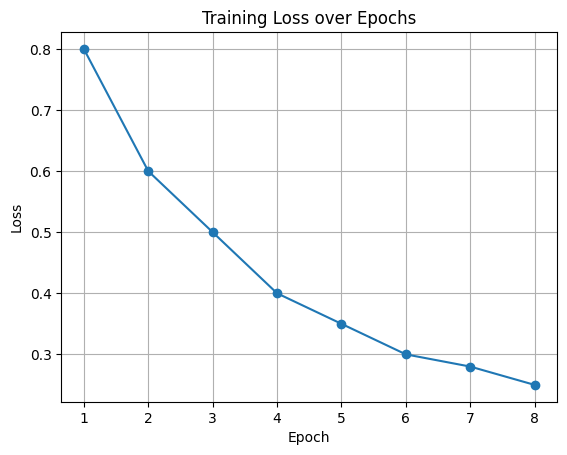

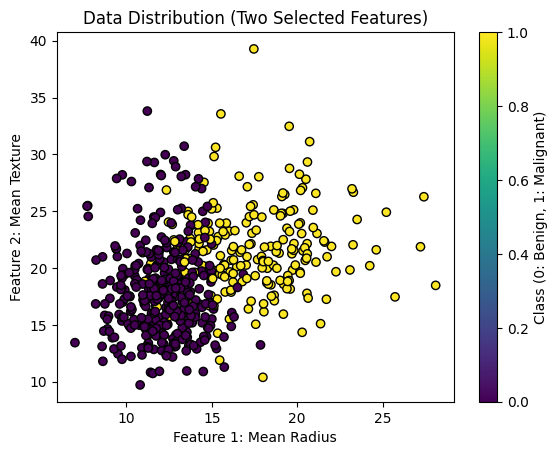

In [17]:
import matplotlib.pyplot as plt

# Example: Training Loss Plot
losses = [0.8, 0.6, 0.5, 0.4, 0.35, 0.3, 0.28, 0.25]  # Replace with real values from training
plt.plot(range(1, len(losses) + 1), losses, marker='o')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

# Data Distribution Plot
# Choose two features to visualize
feature_1_idx = 0  # First feature column
feature_2_idx = 1  # Second feature column

plt.scatter(X[:, feature_1_idx], X[:, feature_2_idx], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Feature 1: Mean Radius')  # Update based on chosen features
plt.ylabel('Feature 2: Mean Texture')  # Update based on chosen features
plt.title('Data Distribution (Two Selected Features)')
plt.colorbar(label='Class (0: Benign, 1: Malignant)')
plt.show()
